In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('expense_data_1.csv')

In [3]:
data.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [4]:
data.drop(['Subcategory', 'Note.1', 'Account.1'], axis=1, inplace=True)

In [5]:
data.columns.values

array(['Date', 'Account', 'Category', 'Note', 'INR', 'Income/Expense',
       'Amount', 'Currency'], dtype=object)

In [6]:
data.dtypes

,0
Date,object
Account,object
Category,object
Note,object
INR,float64
Income/Expense,object
Amount,float64
Currency,object


In [7]:
data['Date']=pd.to_datetime(data['Date'])

data['Date_Only'] = data['Date'].dt.date  # Extract the date part
data['DayOfWeek'] = data['Date'].dt.day_name()
data['Month'] = data['Date'].dt.month
data['Hour'] = data['Date'].dt.hour

In [8]:
data.head()

,Date,Account,Category,Note,INR,Income/Expense,Amount,Currency,Date_Only,DayOfWeek,Month,Hour
0,2022-03-02 10:11:00,CUB - online payment,Food,Brownie,50.0,Expense,50.0,INR,2022-03-02,Wednesday,3,10
1,2022-03-02 10:11:00,CUB - online payment,Other,To lended people,300.0,Expense,300.0,INR,2022-03-02,Wednesday,3,10
2,2022-03-01 19:50:00,CUB - online payment,Food,Dinner,78.0,Expense,78.0,INR,2022-03-01,Tuesday,3,19
3,2022-03-01 18:56:00,CUB - online payment,Transportation,Metro,30.0,Expense,30.0,INR,2022-03-01,Tuesday,3,18
4,2022-03-01 18:22:00,CUB - online payment,Food,Snacks,67.0,Expense,67.0,INR,2022-03-01,Tuesday,3,18


Handle missing values

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

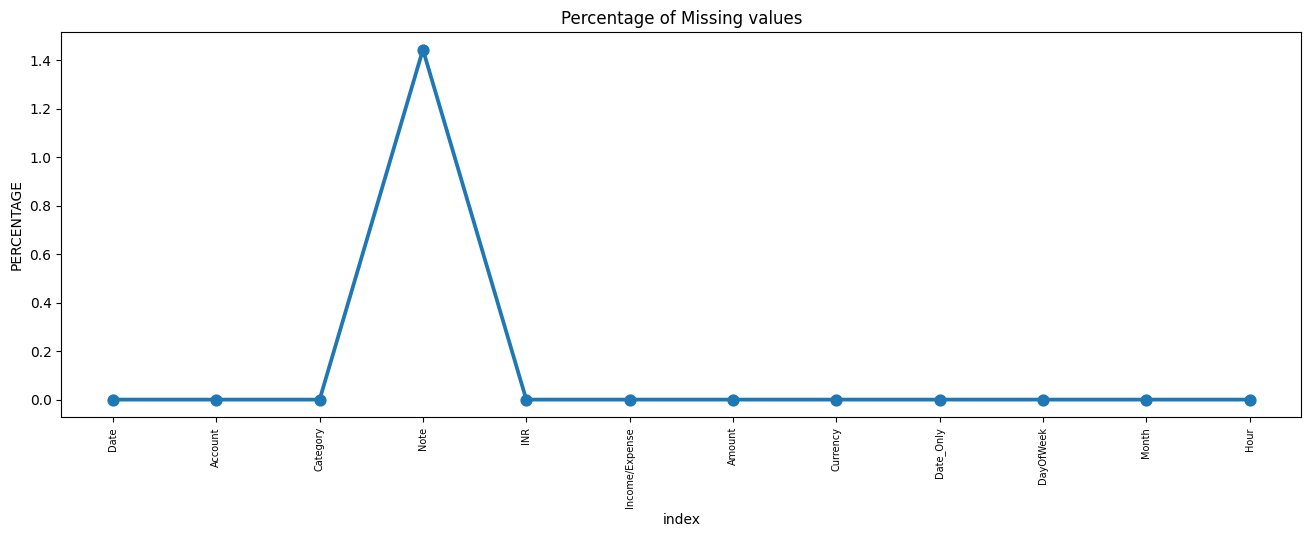

In [10]:
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [11]:
data['Note']=data['Note'].fillna('NA')

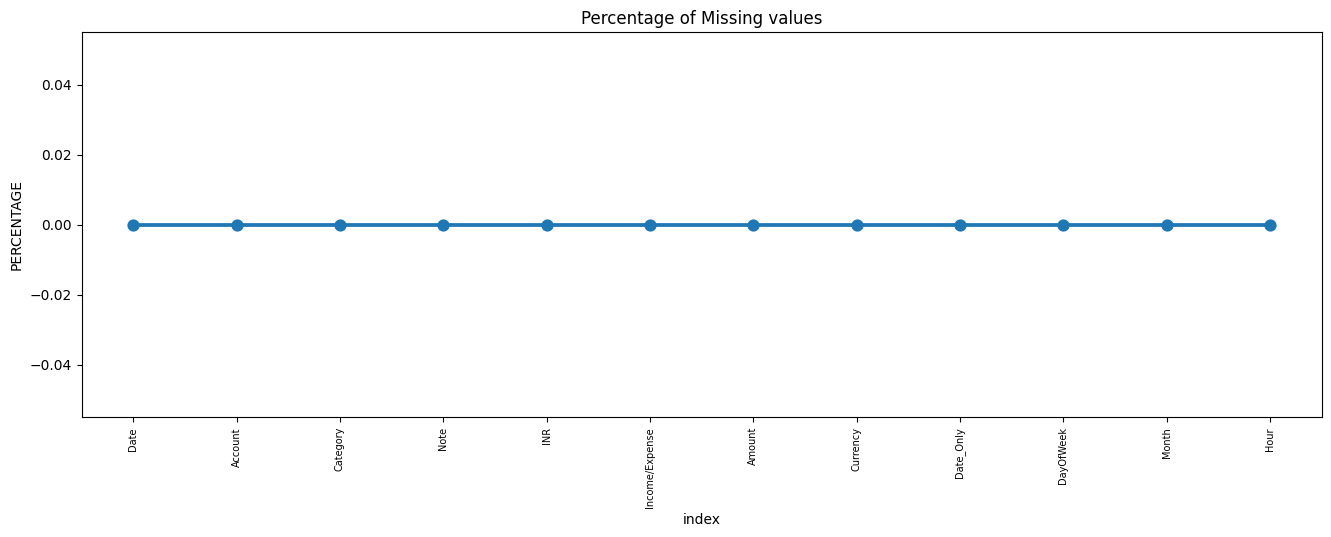

In [12]:
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [13]:
def get_part_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

data['PartOfDay'] = data['Hour'].apply(get_part_of_day)


In [14]:
data.head()

,Date,Account,Category,Note,INR,Income/Expense,Amount,Currency,Date_Only,DayOfWeek,Month,Hour,PartOfDay
0,2022-03-02 10:11:00,CUB - online payment,Food,Brownie,50.0,Expense,50.0,INR,2022-03-02,Wednesday,3,10,Morning
1,2022-03-02 10:11:00,CUB - online payment,Other,To lended people,300.0,Expense,300.0,INR,2022-03-02,Wednesday,3,10,Morning
2,2022-03-01 19:50:00,CUB - online payment,Food,Dinner,78.0,Expense,78.0,INR,2022-03-01,Tuesday,3,19,Evening
3,2022-03-01 18:56:00,CUB - online payment,Transportation,Metro,30.0,Expense,30.0,INR,2022-03-01,Tuesday,3,18,Evening
4,2022-03-01 18:22:00,CUB - online payment,Food,Snacks,67.0,Expense,67.0,INR,2022-03-01,Tuesday,3,18,Evening


In [15]:
df = pd.DataFrame(data)

# Apply One-Hot Encoding to the Category column and add it to the original DataFrame
data = pd.get_dummies(df, columns=['Category','Income/Expense'], drop_first=False, dtype=float)

In [16]:
data.head()

,Date,Account,Note,INR,Amount,Currency,Date_Only,DayOfWeek,Month,Hour,...,Category_Gift,Category_Household,Category_Other,Category_Petty cash,Category_Salary,Category_Self-development,Category_Social Life,Category_Transportation,Income/Expense_Expense,Income/Expense_Income
0,2022-03-02 10:11:00,CUB - online payment,Brownie,50.0,50.0,INR,2022-03-02,Wednesday,3,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2022-03-02 10:11:00,CUB - online payment,To lended people,300.0,300.0,INR,2022-03-02,Wednesday,3,10,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2022-03-01 19:50:00,CUB - online payment,Dinner,78.0,78.0,INR,2022-03-01,Tuesday,3,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2022-03-01 18:56:00,CUB - online payment,Metro,30.0,30.0,INR,2022-03-01,Tuesday,3,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,2022-03-01 18:22:00,CUB - online payment,Snacks,67.0,67.0,INR,2022-03-01,Tuesday,3,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


standardize amount

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
data['Amount_Standardized'] = scaler.fit_transform(data[['Amount']])

Standardized amount is how far each data point is from the mean in terms of standard deviations.


*   A higher standardized amount means that the value of Amount is above the average and has a larger magnitude relative to the mean.
*   A lower standardized amount means that the value is closer to the average or below it.

Clustering

In [19]:
from sklearn.cluster import KMeans

In [20]:
data.columns.values

array(['Date', 'Account', 'Note', 'INR', 'Amount', 'Currency',
       'Date_Only', 'DayOfWeek', 'Month', 'Hour', 'PartOfDay',
       'Category_Allowance', 'Category_Apparel', 'Category_Beauty',
       'Category_Education', 'Category_Food', 'Category_Gift',
       'Category_Household', 'Category_Other', 'Category_Petty cash',
       'Category_Salary', 'Category_Self-development',
       'Category_Social Life', 'Category_Transportation',
       'Income/Expense_Expense', 'Income/Expense_Income',
       'Amount_Standardized'], dtype=object)

In [27]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Amount_Standardized', 'Category_Allowance', 'Category_Apparel', 'Category_Beauty', 'Category_Education', 'Category_Food',	'Category_Gift',	'Category_Household',	'Category_Other',	'Category_Petty cash',	'Category_Salary',	'Category_Self-development',	'Category_Social Life',	'Category_Transportation','Income/Expense_Expense', 'Income/Expense_Income']])

In [28]:
categories = [
    'Category_Allowance', 'Category_Apparel', 'Category_Beauty',
    'Category_Education', 'Category_Food', 'Category_Gift',
    'Category_Household', 'Category_Other', 'Category_Petty cash',
    'Category_Salary', 'Category_Self-development',
    'Category_Social Life', 'Category_Transportation','Income/Expense_Expense', 'Income/Expense_Income'
]


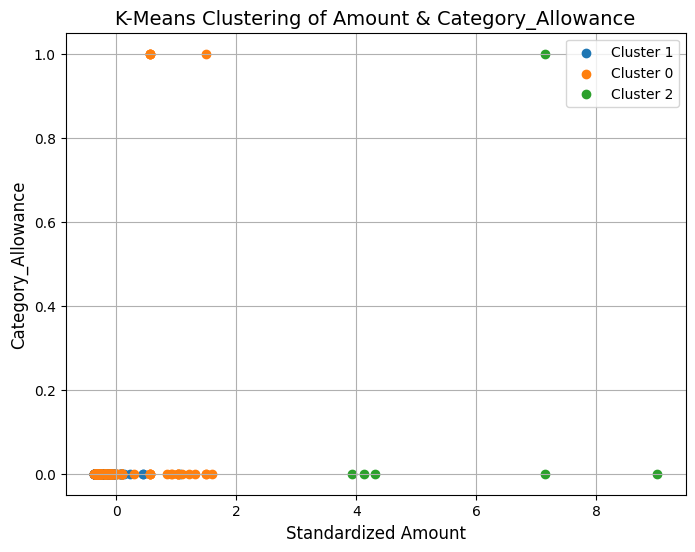

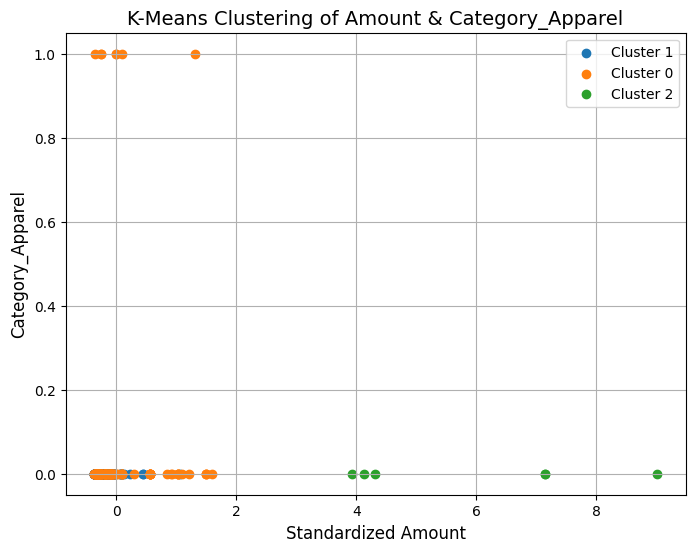

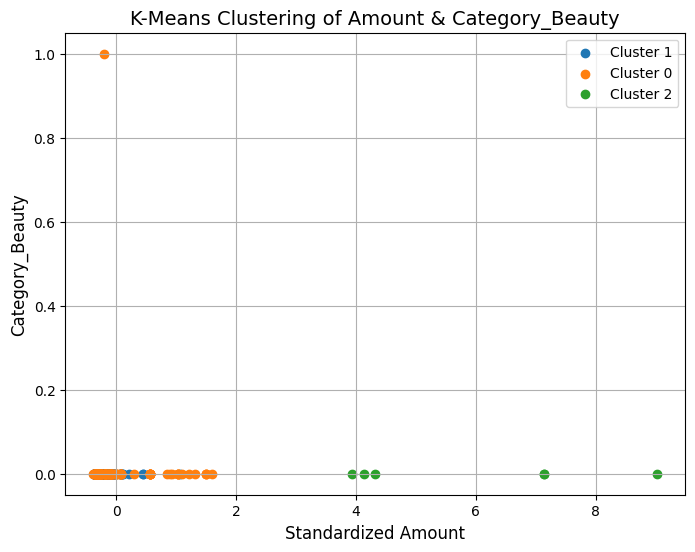

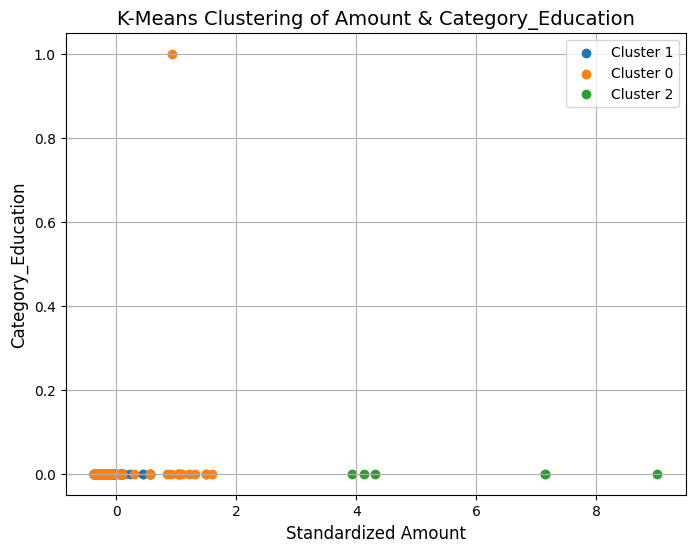

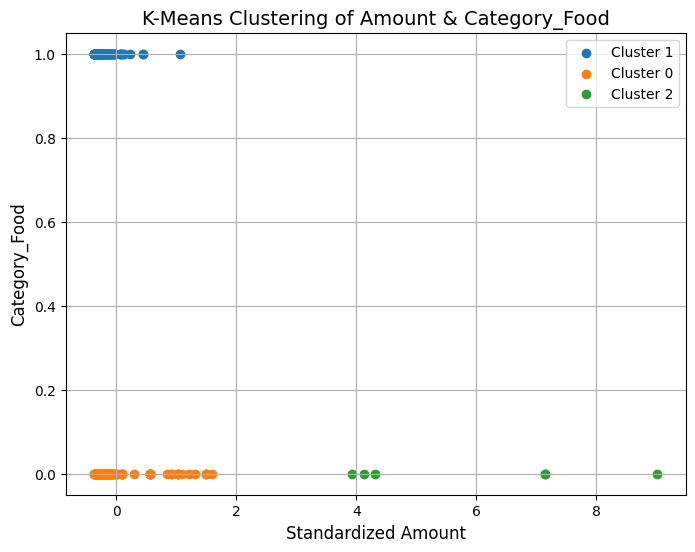

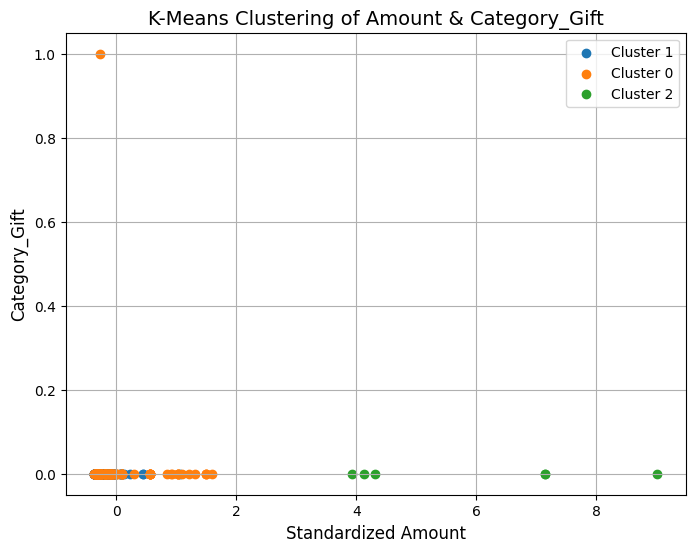

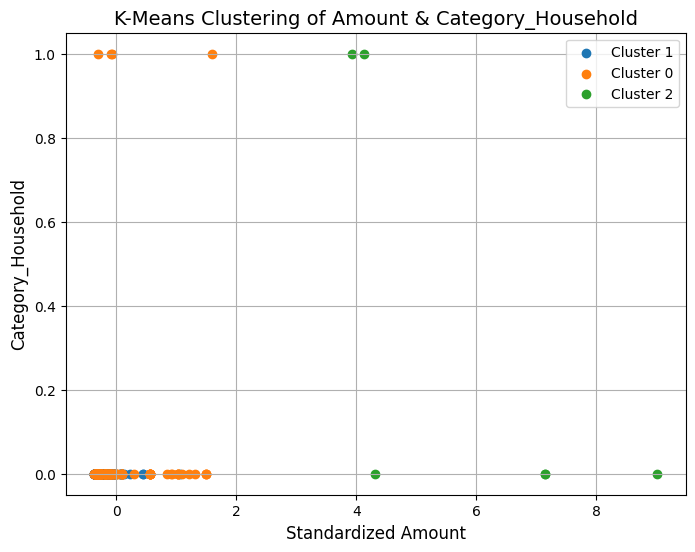

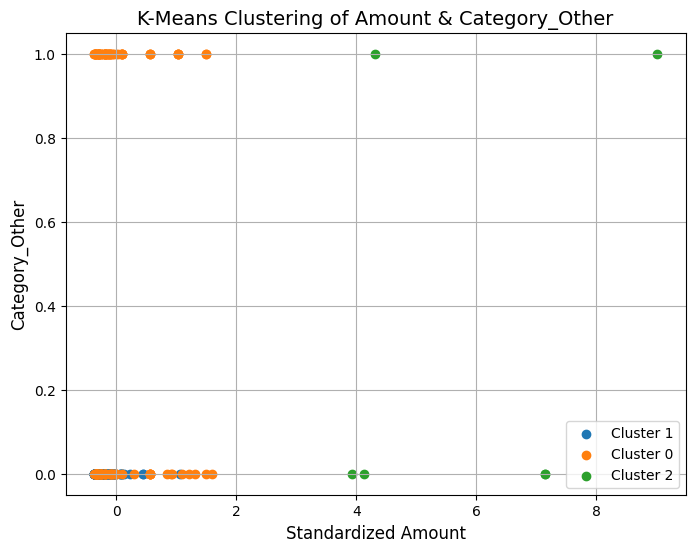

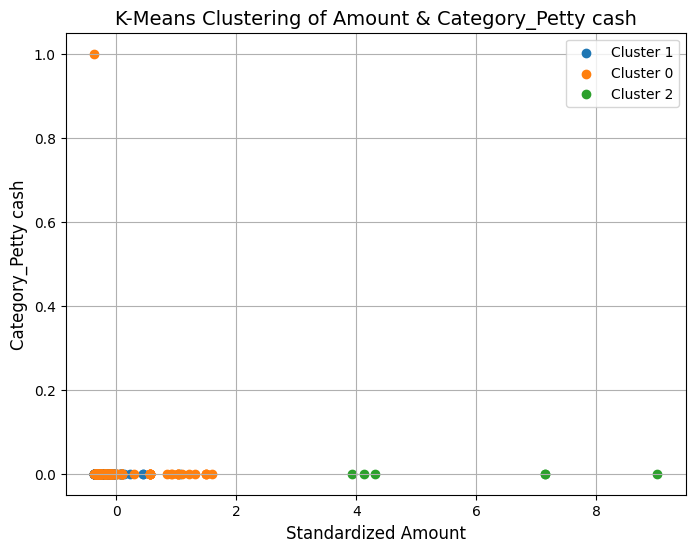

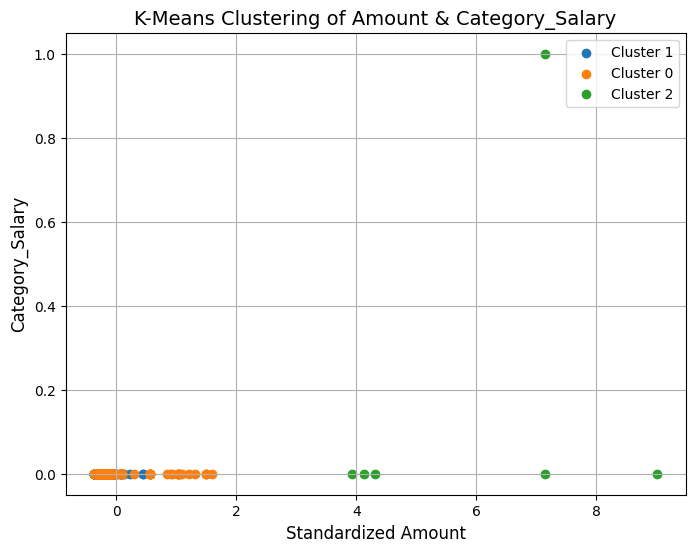

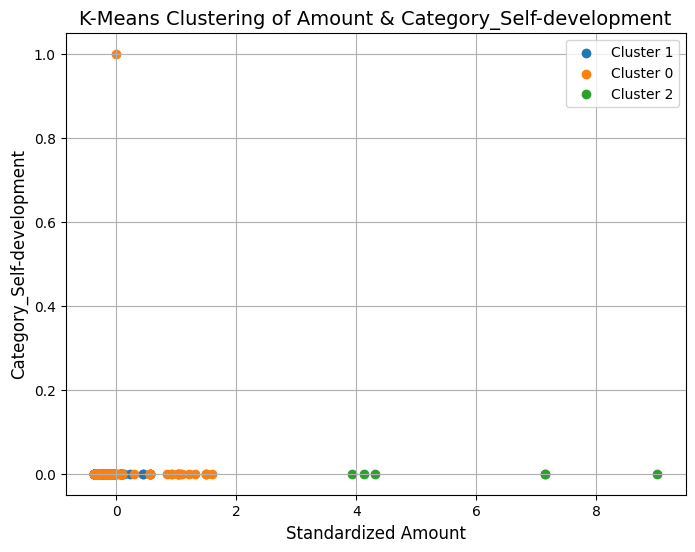

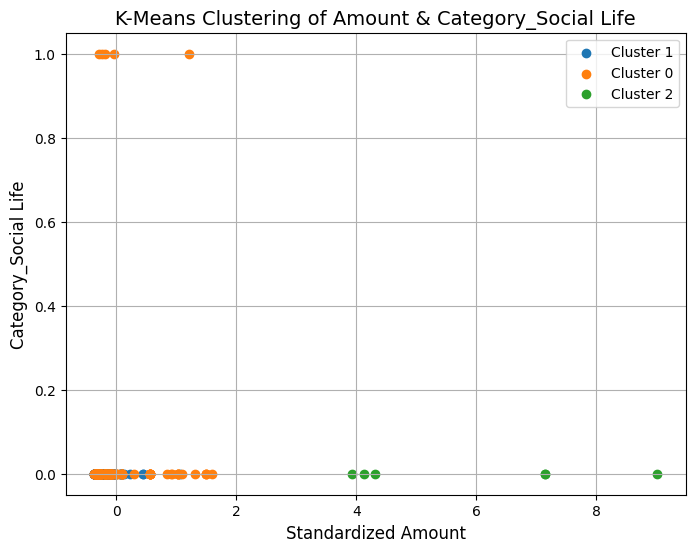

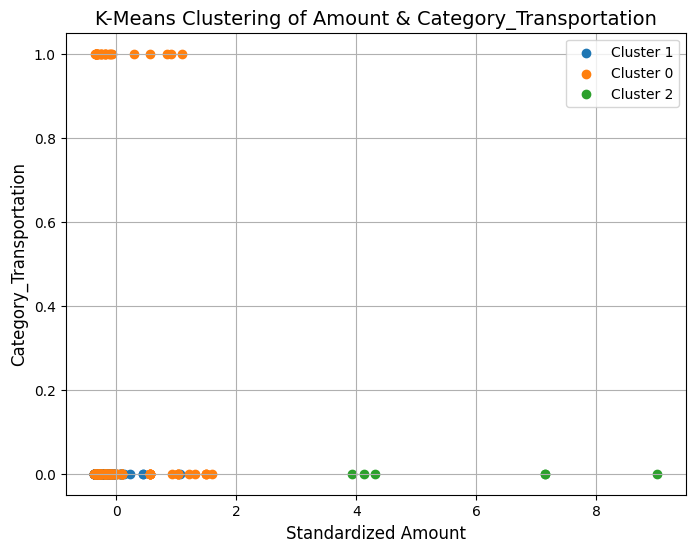

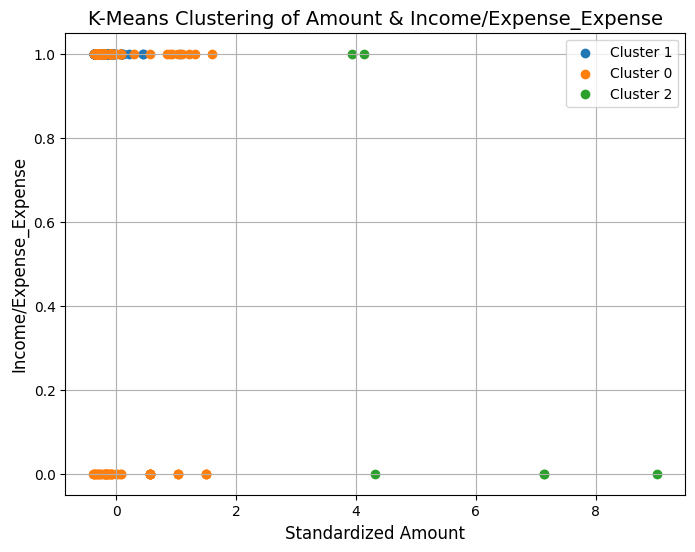

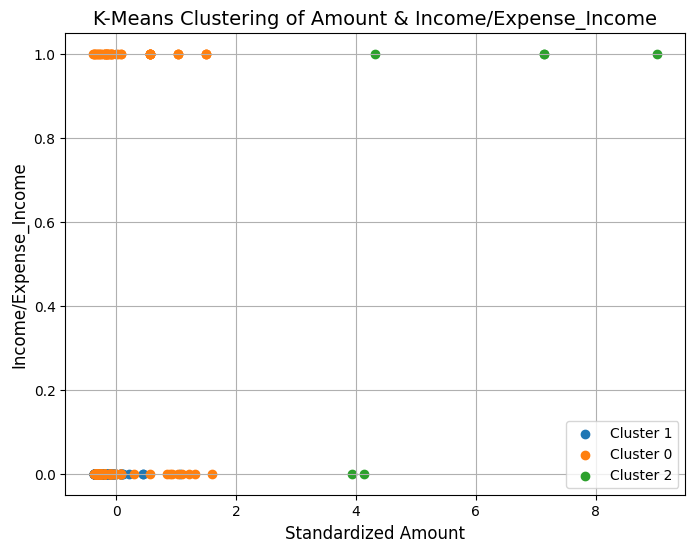

In [29]:
for category in categories:
    plt.figure(figsize=(8, 6))

    for cluster in data['Cluster'].unique():
        cluster_data = data[data['Cluster'] == cluster]
        plt.scatter(cluster_data['Amount_Standardized'], cluster_data[category], label=f'Cluster {cluster}')

    plt.title(f"K-Means Clustering of Amount & {category}", fontsize=14)
    plt.xlabel("Standardized Amount", fontsize=12)
    plt.ylabel(f"{category}", fontsize=12)
    plt.legend()
    plt.grid()
    plt.show()